In [1]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr
import talib.abstract as ta
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 삼성전자 
samsung_raw = fdr.DataReader('005930', '2018')
samsung_raw.columns=['open','high','low','close', 'volume', 'change']
# 코스피지수
kospi_raw = fdr.DataReader('KS11', '2018')
kospi_raw.columns=['open','high','low','close', 'volume', 'change']

In [3]:
samsung = samsung_raw

# 기간별 삼성전자 종가 이동평균 계산
samsung['ma5'] = ta.MA(samsung_raw, timeperiod=5)
samsung['ma10'] = ta.MA(samsung_raw, timeperiod=10)
samsung['ma20'] = ta.MA(samsung_raw, timeperiod=20)
samsung['ma60'] = ta.MA(samsung_raw, timeperiod=60)
samsung['ma120'] = ta.MA(samsung_raw, timeperiod=120)

# 기간별 코스피지수 종가 이동평균 계산
samsung['kospi_ma5'] = ta.MA(kospi_raw, timeperiod=5)
samsung['kospi_ma10'] = ta.MA(kospi_raw, timeperiod=10)
samsung['kospi_ma20'] = ta.MA(kospi_raw, timeperiod=20)
samsung['kospi_ma60'] = ta.MA(kospi_raw, timeperiod=60)
samsung['kospi_ma120'] = ta.MA(kospi_raw, timeperiod=120)

# 볼린저 밴드
samsung['upperband'], samsung['middleband'], samsung['lowerband'] = \
ta.BBANDS(samsung_raw.close)

### train / test split

In [4]:
samsung_train = samsung['2019-01-02':'2019-12-30']
samsung_train.describe()

,open,high,low,close,volume,change,ma5,ma10,ma20,ma60,ma120,kospi_ma5,kospi_ma10,kospi_ma20,kospi_ma60,kospi_ma120,upperband,middleband,lowerband
count,246.000000,246.000000,246.000000,246.000000,2.460000e+02,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.00000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,46563.414634,46989.024390,46122.154472,46583.333333,1.089653e+07,0.001593,46442.317073,46269.044715,45974.014228,45192.818428,44695.569106,2094.44900,2092.980858,2091.221691,2088.160921,2106.053129,47569.464638,46442.317073,45315.169509
std,3799.192036,3788.349684,3773.149909,3776.215397,4.095583e+06,0.014517,3698.351304,3595.503939,3400.952705,2519.799633,1485.351045,76.82408,74.194206,68.873925,53.042514,38.998252,3783.820731,3698.351304,3691.159267
min,37450.000000,37600.000000,36850.000000,37450.000000,4.406531e+06,-0.040678,38130.000000,38340.000000,38905.000000,41337.500000,43120.000000,1915.72400,1922.012000,1930.280000,2003.784333,2040.231250,39019.888875,38130.000000,36713.809595
25%,44012.500000,44362.500000,43650.000000,44000.000000,8.045918e+06,-0.007418,44055.000000,44010.000000,44070.625000,44284.583333,43463.541667,2050.85250,2048.558250,2050.640500,2048.037458,2064.371042,44880.998508,44055.000000,43123.997794
50%,46000.000000,46375.000000,45475.000000,46025.000000,9.871402e+06,0.001120,45800.000000,45785.000000,45506.250000,44890.833333,44544.375000,2090.51800,2090.493500,2094.607000,2085.179000,2122.595875,47014.644087,45800.000000,44638.304929
75%,48762.500000,49237.500000,48487.500000,49012.500000,1.259267e+07,0.010540,48582.500000,48542.500000,47311.875000,45768.125000,45182.916667,2154.47850,2151.500750,2149.961500,2127.841625,2134.218021,49606.340381,48582.500000,47409.954470
max,57000.000000,57300.000000,56000.000000,56700.000000,2.917870e+07,0.040863,56100.000000,55790.000000,53507.500000,51965.000000,48888.750000,2229.61600,2219.730000,2205.629000,2184.248667,2180.276333,57597.966639,56100.000000,55310.063294


In [5]:
samsung.columns

Index(['open', 'high', 'low', 'close', 'volume', 'change', 'ma5', 'ma10',
       'ma20', 'ma60', 'ma120', 'kospi_ma5', 'kospi_ma10', 'kospi_ma20',
       'kospi_ma60', 'kospi_ma120', 'upperband', 'middleband', 'lowerband'],
      dtype='object')

In [6]:
samsung_test = samsung_raw['2019-12-30':'2020-03-31']
samsung_test.describe()

,open,high,low,close,volume,change,ma5,ma10,ma20,ma60,ma120,kospi_ma5,kospi_ma10,kospi_ma20,kospi_ma60,kospi_ma120,upperband,middleband,lowerband
count,63.000000,63.000000,63.00000,63.000000,6.300000e+01,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,55823.809524,56660.317460,55010.31746,55833.333333,2.452377e+07,-0.002298,56083.333333,56438.015873,56895.992063,55542.063492,52145.873016,2041.030508,2064.699778,2103.183738,2130.253825,2089.010675,58435.772286,56083.333333,53730.894381
std,5176.138313,4918.424534,5425.24088,5263.760768,1.334832e+07,0.027524,4888.781430,4262.425909,2949.212974,1758.360545,1836.638921,227.270309,200.729346,136.554437,36.867895,20.674466,4362.707228,4888.781430,5594.121645
min,42600.000000,43550.000000,42300.00000,42500.000000,8.356767e+06,-0.063877,44680.000000,46330.000000,49665.000000,51965.000000,48888.750000,1492.824000,1575.467000,1727.932500,2017.711000,2057.210500,48057.928359,44680.000000,40615.216583
25%,54300.000000,54950.000000,53600.00000,54200.000000,1.448685e+07,-0.019246,55480.000000,55630.000000,54998.750000,54313.333333,50524.583333,1999.406000,2011.577000,2098.840750,2117.519083,2070.171667,56613.831202,55480.000000,53174.549567
50%,56700.000000,58000.000000,56200.00000,57200.000000,2.082194e+07,0.000000,57260.000000,57550.000000,58060.000000,55979.166667,52517.916667,2157.834000,2169.438000,2163.030000,2146.625167,2087.380583,59809.202745,57260.000000,54941.000156
75%,59800.000000,60550.000000,59250.00000,59950.000000,3.036685e+07,0.012322,60020.000000,59570.000000,59227.500000,57002.916667,54029.791667,2196.059000,2188.142000,2189.805500,2155.665500,2109.982125,61673.684733,60020.000000,58388.652963
max,62000.000000,62800.000000,61700.00000,62400.000000,5.946293e+07,0.104706,61640.000000,60740.000000,60045.000000,57781.666667,54240.000000,2243.798000,2229.332000,2199.959000,2164.997167,2117.898417,63761.755137,61640.000000,60409.715480


In [7]:
# 정규화
def StandardScaling(df):    
    scaler = StandardScaler()

    df_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled)
    df_scaled.columns = df.columns
    df_scaled.index = df.index

    return df_scaled

In [8]:
samsung_train_scaled = StandardScaling(samsung_train)
samsung_test_scaled = StandardScaling(samsung_test)

In [9]:
# window_size split
def make_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [50]:
cols = samsung_train_scaled.columns
feature_cols = cols.drop('close')
label_cols = ['close']

train_feature = samsung_train_scaled[feature_cols]
train_label = samsung_train_scaled[label_cols]
test_feature = samsung_test_scaled[feature_cols]
test_label = samsung_test_scaled[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 5)
# test dataset
test_feature, test_label = make_dataset(test_feature, test_label, 5)

In [51]:
# temp
train_feature.shape, train_label.shape, test_feature.shape, test_label.shape

((241, 5, 18), (241, 1), (58, 5, 18), (58, 1))

In [52]:
# 검증을 위한 validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((192, 5, 18), (49, 5, 18), (192, 1), (49, 1))

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [54]:
import os

In [64]:
model.compile(loss='mean_squared_error', optimizer='adam')
# early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join('./sample/', 'LSTM_model.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(train_feature, train_label, 
                    epochs=200, 
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=[checkpoint])
#                     callbacks=[early_stop, checkpoint])

Train on 192 samples, validate on 49 samples
Epoch 1/200
192/192 [==============================] - 0s 2ms/step - loss: 0.0249 - val_loss: 0.0631

Epoch 00001: val_loss improved from inf to 0.06308, saving model to ./sample/LSTM_model.h5
Epoch 2/200
192/192 [==============================] - 0s 162us/step - loss: 0.0228 - val_loss: 0.0453

Epoch 00002: val_loss improved from 0.06308 to 0.04532, saving model to ./sample/LSTM_model.h5
Epoch 3/200
192/192 [==============================] - 0s 156us/step - loss: 0.0229 - val_loss: 0.0425

Epoch 00003: val_loss improved from 0.04532 to 0.04248, saving model to ./sample/LSTM_model.h5
Epoch 4/200
192/192 [==============================] - 0s 176us/step - loss: 0.0215 - val_loss: 0.0721

Epoch 00004: val_loss did not improve from 0.04248
Epoch 5/200
192/192 [==============================] - 0s 147us/step - loss: 0.0219 - val_loss: 0.0646

Epoch 00005: val_loss did not improve from 0.04248
Epoch 6/200
192/192 [==============================] -

192/192 [==============================] - 0s 156us/step - loss: 0.0149 - val_loss: 0.2401

Epoch 00052: val_loss did not improve from 0.04248
Epoch 53/200
192/192 [==============================] - 0s 151us/step - loss: 0.0141 - val_loss: 0.2488

Epoch 00053: val_loss did not improve from 0.04248
Epoch 54/200
192/192 [==============================] - 0s 161us/step - loss: 0.0138 - val_loss: 0.2642

Epoch 00054: val_loss did not improve from 0.04248
Epoch 55/200
192/192 [==============================] - 0s 151us/step - loss: 0.0134 - val_loss: 0.2682

Epoch 00055: val_loss did not improve from 0.04248
Epoch 56/200
192/192 [==============================] - 0s 145us/step - loss: 0.0134 - val_loss: 0.2870

Epoch 00056: val_loss did not improve from 0.04248
Epoch 57/200
192/192 [==============================] - 0s 151us/step - loss: 0.0132 - val_loss: 0.2678

Epoch 00057: val_loss did not improve from 0.04248
Epoch 58/200
192/192 [==============================] - 0s 151us/step - loss:

192/192 [==============================] - 0s 151us/step - loss: 0.0091 - val_loss: 0.3648

Epoch 00104: val_loss did not improve from 0.04248
Epoch 105/200
192/192 [==============================] - 0s 166us/step - loss: 0.0094 - val_loss: 0.3773

Epoch 00105: val_loss did not improve from 0.04248
Epoch 106/200
192/192 [==============================] - 0s 166us/step - loss: 0.0092 - val_loss: 0.4100

Epoch 00106: val_loss did not improve from 0.04248
Epoch 107/200
192/192 [==============================] - 0s 151us/step - loss: 0.0097 - val_loss: 0.3098

Epoch 00107: val_loss did not improve from 0.04248
Epoch 108/200
192/192 [==============================] - 0s 151us/step - loss: 0.0094 - val_loss: 0.3332

Epoch 00108: val_loss did not improve from 0.04248
Epoch 109/200
192/192 [==============================] - 0s 145us/step - loss: 0.0088 - val_loss: 0.3326

Epoch 00109: val_loss did not improve from 0.04248
Epoch 110/200
192/192 [==============================] - 0s 145us/step -

192/192 [==============================] - 0s 151us/step - loss: 0.0062 - val_loss: 0.5808

Epoch 00156: val_loss did not improve from 0.04248
Epoch 157/200
192/192 [==============================] - 0s 156us/step - loss: 0.0061 - val_loss: 0.6930

Epoch 00157: val_loss did not improve from 0.04248
Epoch 158/200
192/192 [==============================] - 0s 145us/step - loss: 0.0059 - val_loss: 0.5844

Epoch 00158: val_loss did not improve from 0.04248
Epoch 159/200
192/192 [==============================] - 0s 151us/step - loss: 0.0065 - val_loss: 0.8317

Epoch 00159: val_loss did not improve from 0.04248
Epoch 160/200
192/192 [==============================] - 0s 156us/step - loss: 0.0059 - val_loss: 0.7491

Epoch 00160: val_loss did not improve from 0.04248
Epoch 161/200
192/192 [==============================] - 0s 151us/step - loss: 0.0055 - val_loss: 0.9510

Epoch 00161: val_loss did not improve from 0.04248
Epoch 162/200
192/192 [==============================] - 0s 156us/step -

In [65]:
# weight 로딩
model.load_weights('./sample/LSTM_model.h5')

# 예측
pred = model.predict(test_feature)

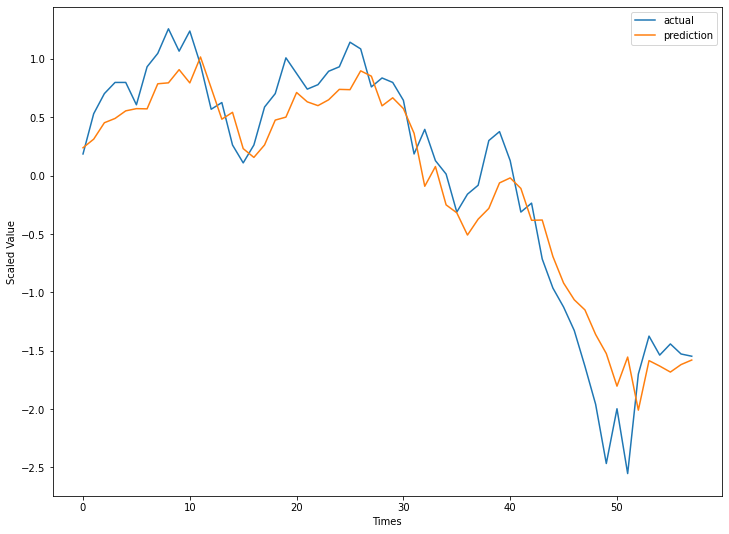

In [66]:
# 시각화
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.xlabel('Times')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

In [67]:
df = pd.DataFrame(pred, columns=['pred'])
df['test_label'] = test_label

In [68]:
df.corr()

,pred,test_label
pred,1.000000,0.960777
test_label,0.960777,1.000000


In [60]:
# callback , modelsave

# gradient boost 돌려서 잘나온 종목을 최종 강화학습할 종목선정하는 것 고려

In [61]:
len(pred), len(test_label)

(58, 58)

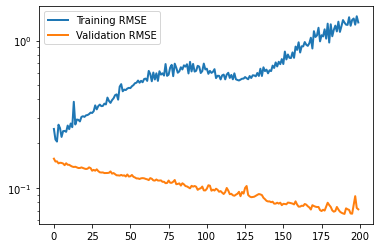

In [69]:
loss_history = pd.DataFrame(history.history).pow(.5)
loss_history.columns=['Training RMSE', 'Validation RMSE']
loss_history.plot(logy=True, lw=2)

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 16)                2240      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________
